# Comparisons with real data

To make a comparisons of outcomes we need to visualize our data in one

![](https://ccbaumler.github.io/JupyterLite-R-tutorial/lab/index.html?path=notebooks%2Fpretty-comparison.png)



In [29]:
search()

 [1] ".GlobalEnv"        "package:ggplot2"   "package:hera"     
 [4] "package:stats"     "package:graphics"  "package:grDevices"
 [7] "package:utils"     "package:datasets"  "package:methods"  
[10] "Autoloads"         "package:base"     

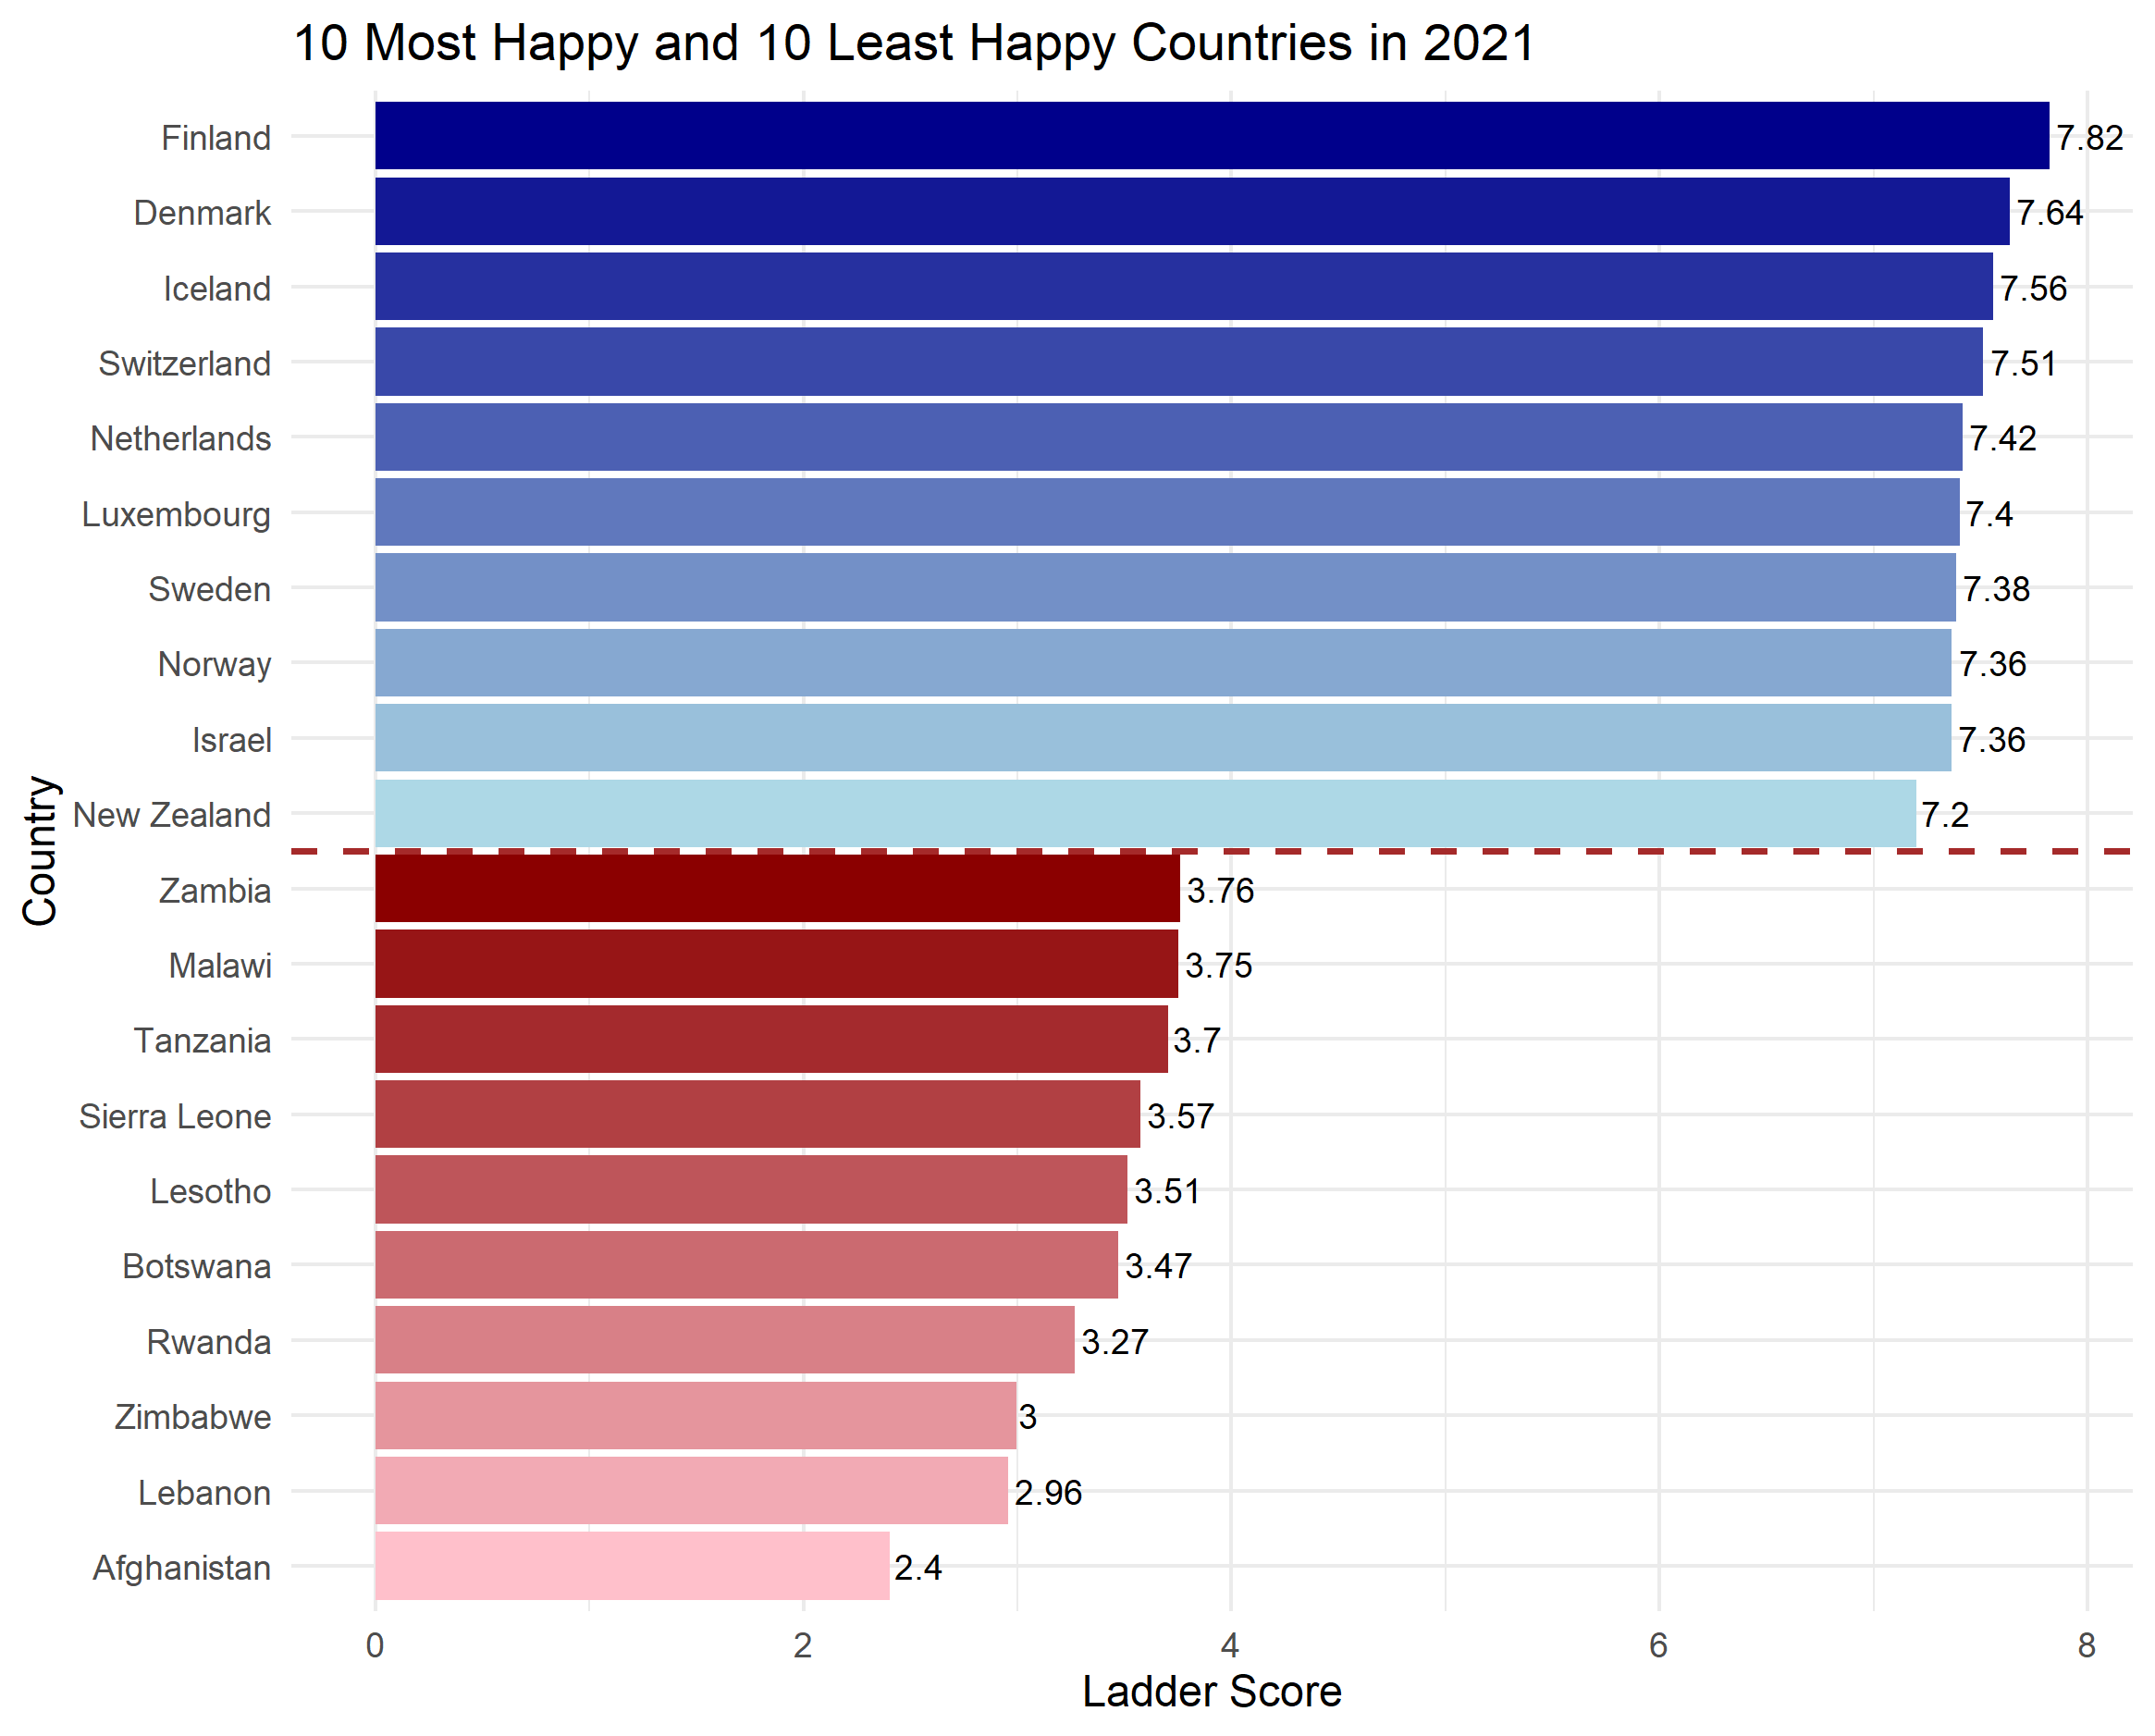

In [26]:
IRdisplay::display_png(file = "pretty-comparison.png")

In [2]:
list.files("../data/")

[1] "Museums_in_DC.geojson" "WHR2024.csv"           "bar.vl.json"          
[4] "fasta-example.fasta"   "inflammation-01.csv"   "iris.csv"             
[7] "matplotlib.png"       

In [3]:
happy_df <- read.csv('../data//WHR2024.csv')

In [4]:
str(happy_df)

'data.frame':	1969 obs. of  28 variables:
 $ Year                                      : int  2024 2023 2022 2021 2020 2019 2018 2017 2016 2015 ...
 $ Rank                                      : int  1 143 137 146 150 153 154 145 141 154 ...
 $ Country.name                              : chr  "Finland" "Afghanistan" "Afghanistan" "Afghanistan" ...
 $ Ladder.score                              : num  7.74 1.72 1.86 2.4 2.52 ...
 $ upperwhisker                              : num  7.81 1.77 1.92 2.47 2.6 ...
 $ lowerwhisker                              : num  7.66 1.67 1.79 2.34 2.45 ...
 $ Explained.by..Log.GDP.per.capita          : num  1.749 0.628 0.645 0.758 0.37 ...
 $ Explained.by..Social.support              : num  1.78 0 0 0 0 ...
 $ Explained.by..Healthy.life.expectancy     : num  0.824 0.242 0.087 0.289 0.126 0.266 NA NA NA NA ...
 $ Explained.by..Freedom.to.make.life.choices: num  0.986 0 0 0 0 0 NA NA NA NA ...
 $ Explained.by..Generosity                  : num  0.11 0.091 0.09

In [5]:
summary(happy_df)

      Year           Rank        Country.name        Ladder.score  
 Min.   :2011   Min.   :  1.00   Length:1969        Min.   :1.364  
 1st Qu.:2015   1st Qu.: 38.00   Class :character   1st Qu.:4.596  
 Median :2018   Median : 76.00   Mode  :character   Median :5.456  
 Mean   :2018   Mean   : 76.43                      Mean   :5.452  
 3rd Qu.:2021   3rd Qu.:114.00                      3rd Qu.:6.295  
 Max.   :2024   Max.   :158.00                      Max.   :7.856  
                                                                   
  upperwhisker    lowerwhisker   Explained.by..Log.GDP.per.capita
 Min.   :1.427   Min.   :1.301   Min.   :0.0000                  
 1st Qu.:4.885   1st Qu.:4.638   1st Qu.:0.9012                  
 Median :5.775   Median :5.529   Median :1.2635                  
 Mean   :5.649   Mean   :5.419   Mean   :1.2203                  
 3rd Qu.:6.458   3rd Qu.:6.254   3rd Qu.:1.5670                  
 Max.   :7.904   Max.   :7.780   Max.   :2.2090             

In [6]:
head(happy_df)

  Year Rank Country.name Ladder.score upperwhisker lowerwhisker
1 2024   1  Finland      7.736        7.810        7.662       
2 2023 143  Afghanistan  1.721        1.775        1.667       
3 2022 137  Afghanistan  1.859        1.923        1.795       
4 2021 146  Afghanistan  2.404        2.469        2.339       
5 2020 150  Afghanistan  2.523        2.596        2.449       
6 2019 153  Afghanistan  2.567        2.628        2.506       
  Explained.by..Log.GDP.per.capita Explained.by..Social.support
1 1.749                            1.783                       
2 0.628                            0.000                       
3 0.645                            0.000                       
4 0.758                            0.000                       
5 0.370                            0.000                       
6 0.301                            0.356                       
  Explained.by..Healthy.life.expectancy
1 0.824                                
2 0.242                 

In [7]:
# https://stackoverflow.com/a/71135652

## figure out which rows are all NA values
all_na_rows = apply(happy_df, 1, function(x) all(is.na(x)))
## figure out which columns are all NA values
all_na_cols = apply(happy_df, 2, function(x) all(is.na(x)))

## drop them
clean_happy_df = happy_df[!all_na_rows, !all_na_cols]
summary(clean_happy_df)

      Year           Rank        Country.name        Ladder.score  
 Min.   :2011   Min.   :  1.00   Length:1969        Min.   :1.364  
 1st Qu.:2015   1st Qu.: 38.00   Class :character   1st Qu.:4.596  
 Median :2018   Median : 76.00   Mode  :character   Median :5.456  
 Mean   :2018   Mean   : 76.43                      Mean   :5.452  
 3rd Qu.:2021   3rd Qu.:114.00                      3rd Qu.:6.295  
 Max.   :2024   Max.   :158.00                      Max.   :7.856  
                                                                   
  upperwhisker    lowerwhisker   Explained.by..Log.GDP.per.capita
 Min.   :1.427   Min.   :1.301   Min.   :0.0000                  
 1st Qu.:4.885   1st Qu.:4.638   1st Qu.:0.9012                  
 Median :5.775   Median :5.529   Median :1.2635                  
 Mean   :5.649   Mean   :5.419   Mean   :1.2203                  
 3rd Qu.:6.458   3rd Qu.:6.254   3rd Qu.:1.5670                  
 Max.   :7.904   Max.   :7.780   Max.   :2.2090             

In [8]:
df_2021 <- clean_happy_df[clean_happy_df$Year == 2021, ]
top_indices <- order(df_2021$Ladder.score, decreasing = TRUE)[1:10]

top_rows <- df_2021[top_indices, ]
top_rows

     Year Rank Country.name Ladder.score upperwhisker lowerwhisker
567  2021  1   Finland      7.821        7.886        7.756       
459  2021  2   Denmark      7.636        7.710        7.563       
739  2021  3   Iceland      7.557        7.651        7.464       
1688 2021  4   Switzerland  7.512        7.586        7.437       
1240 2021  5   Netherlands  7.415        7.471        7.359       
1032 2021  6   Luxembourg   7.404        7.501        7.307       
1675 2021  7   Sweden       7.384        7.454        7.315       
1326 2021  8   Norway       7.365        7.440        7.290       
817  2021  9   Israel       7.364        7.426        7.301       
1253 2021 10   New Zealand  7.200        7.279        7.120       
     Explained.by..Log.GDP.per.capita Explained.by..Social.support
567  1.892                            1.258                       
459  1.953                            1.243                       
739  1.936                            1.320                   

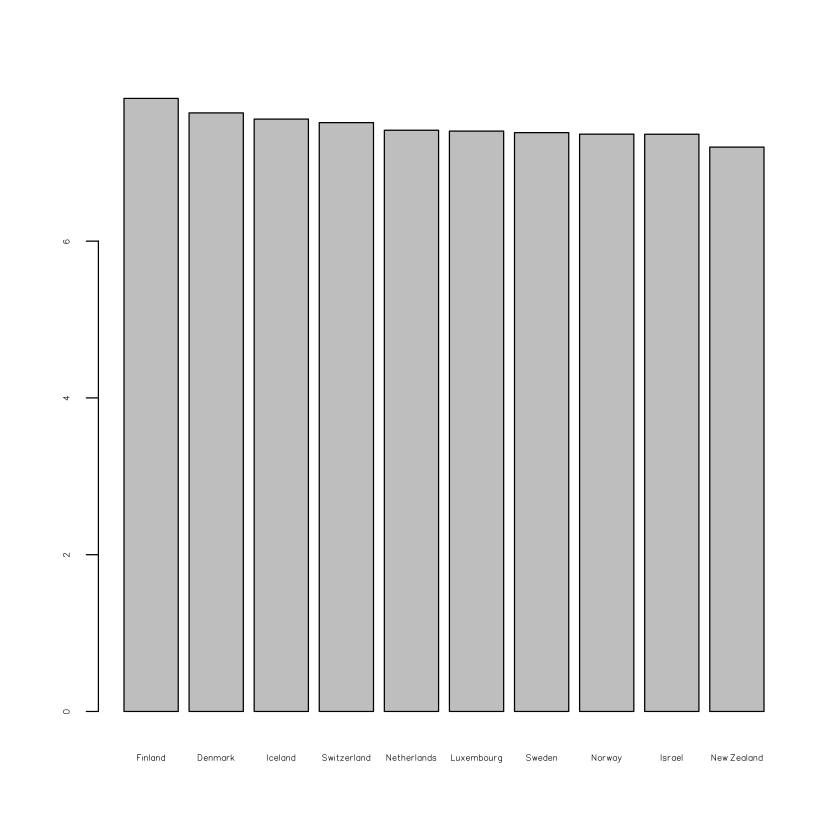

In [9]:
barplot(top_rows$Ladder.score, names.arg=top_rows$Country.name)

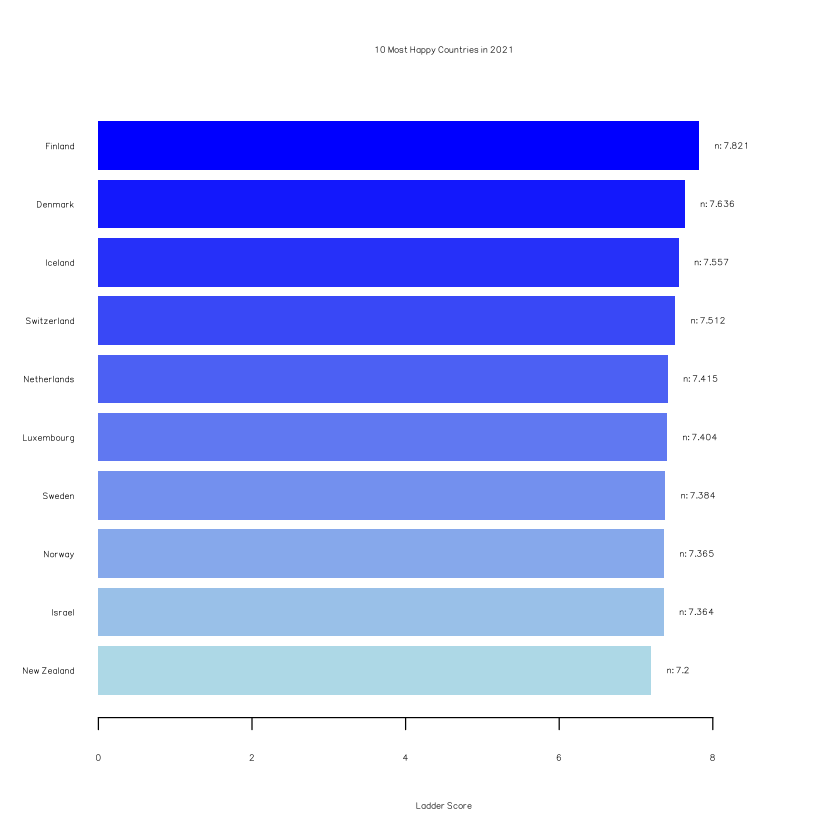

In [10]:
# https://r-graph-gallery.com/37-barplot-with-number-of-observation.html

colors_10_blu <- colorRampPalette(c("lightblue", "blue"))(10)
top_rows <- df_2021[rev(top_indices), ]

compare_top <- barplot(
  top_rows$Ladder.score,
  names.arg = top_rows$Country.name,
  col = colors_10_blu,
  horiz = TRUE,
  las = 1,
  border = FALSE,
  xlim = c(0,9),
  xlab = "Ladder Score",
  main = "10 Most Happy Countries in 2021"
)

text(
  x = top_rows$Ladder.score + 0.2,
  y = compare_top,
  labels = paste("n: ", top_rows$Ladder.score, sep = ""),
  adj = 0  # left align text at x position
)


In [11]:
df_2021 <- clean_happy_df[clean_happy_df$Year == 2021, ]
bottom_indices <- order(df_2021$Ladder.score, decreasing = FALSE)[1:10]

bottom_rows <- df_2021[bottom_indices, ]
bottom_rows

     Year Rank Country.name Ladder.score upperwhisker lowerwhisker
4    2021 146  Afghanistan  2.404        2.469        2.339       
971  2021 145  Lebanon      2.955        3.049        2.862       
1960 2021 144  Zimbabwe     2.995        3.110        2.880       
1491 2021 143  Rwanda       3.268        3.462        3.074       
211  2021 142  Botswana     3.471        3.667        3.275       
983  2021 141  Lesotho      3.512        3.748        3.276       
1543 2021 140  Sierra Leone 3.574        3.732        3.416       
1734 2021 139  Tanzania     3.702        3.847        3.558       
1059 2021 138  Malawi       3.750        3.941        3.560       
1947 2021 137  Zambia       3.760        3.902        3.618       
     Explained.by..Log.GDP.per.capita Explained.by..Social.support
4    0.758                            0.000                       
971  1.392                            0.498                       
1960 0.947                            0.690                   

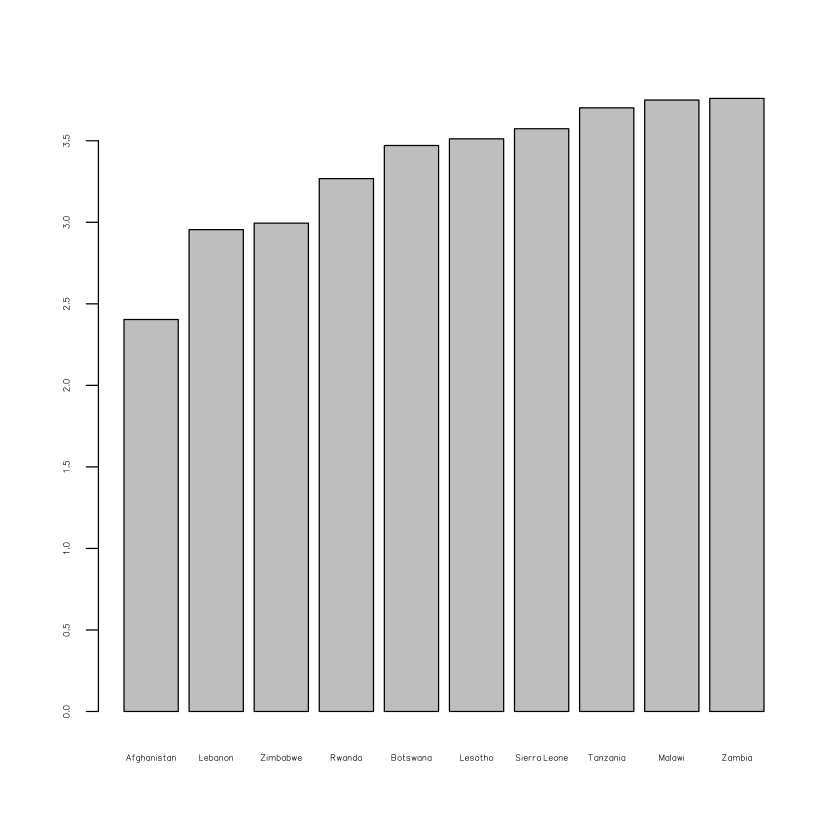

In [12]:
barplot(bottom_rows$Ladder.score, names.arg=bottom_rows$Country.name)

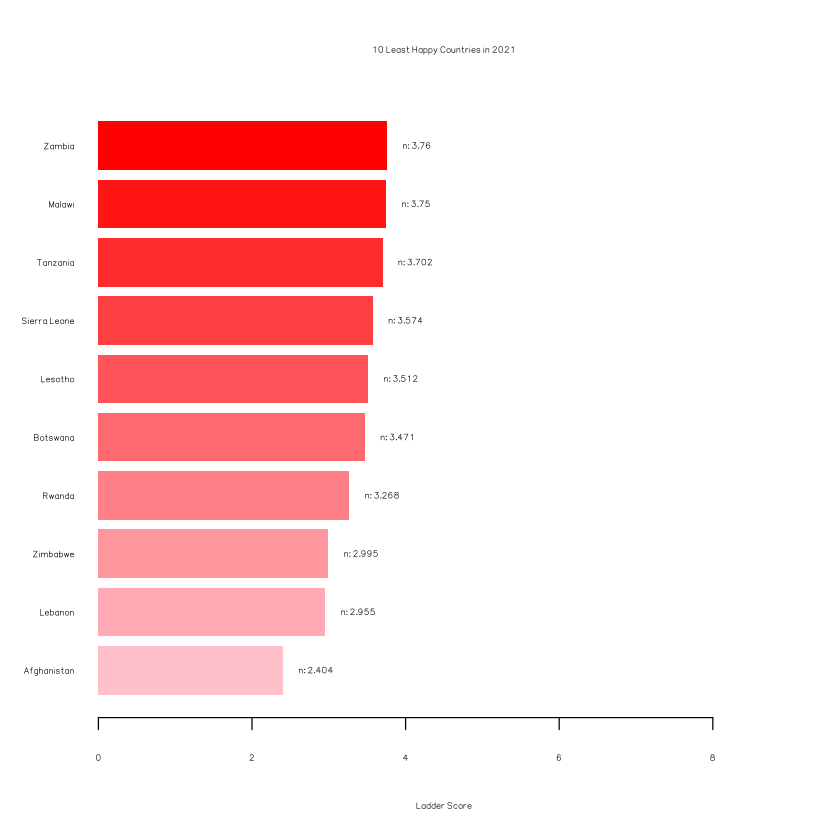

In [13]:
# https://r-graph-gallery.com/37-barplot-with-number-of-observation.html

colors_10_red <- colorRampPalette(c("pink", "red"))(10)

compare_bottom <- barplot(
  bottom_rows$Ladder.score,
  names.arg = bottom_rows$Country.name,
  col = colors_10_red,
  horiz = TRUE,
  las = 1,
  border = FALSE,
  xlim = c(0,9),
  xlab = "Ladder Score",
  main = "10 Least Happy Countries in 2021"
)

text(
  x = bottom_rows$Ladder.score + 0.2,
  y = compare_bottom,
  labels = paste("n: ", bottom_rows$Ladder.score, sep = ""),
  adj = 0  # left align text at x position
)

In [14]:
df_2021 <- clean_happy_df[clean_happy_df$Year == 2021, ]
top_indices <- order(df_2021$Ladder.score, decreasing = TRUE)[1:10]
bottom_indices <- order(df_2021$Ladder.score, decreasing = FALSE)[1:10]

top_bottom_rows <- df_2021[c(bottom_indices, rev(top_indices)), ]
top_bottom_rows

     Year Rank Country.name Ladder.score upperwhisker lowerwhisker
4    2021 146  Afghanistan  2.404        2.469        2.339       
971  2021 145  Lebanon      2.955        3.049        2.862       
1960 2021 144  Zimbabwe     2.995        3.110        2.880       
1491 2021 143  Rwanda       3.268        3.462        3.074       
211  2021 142  Botswana     3.471        3.667        3.275       
983  2021 141  Lesotho      3.512        3.748        3.276       
1543 2021 140  Sierra Leone 3.574        3.732        3.416       
1734 2021 139  Tanzania     3.702        3.847        3.558       
1059 2021 138  Malawi       3.750        3.941        3.560       
1947 2021 137  Zambia       3.760        3.902        3.618       
1253 2021  10  New Zealand  7.200        7.279        7.120       
817  2021   9  Israel       7.364        7.426        7.301       
1326 2021   8  Norway       7.365        7.440        7.290       
1675 2021   7  Sweden       7.384        7.454        7.315   

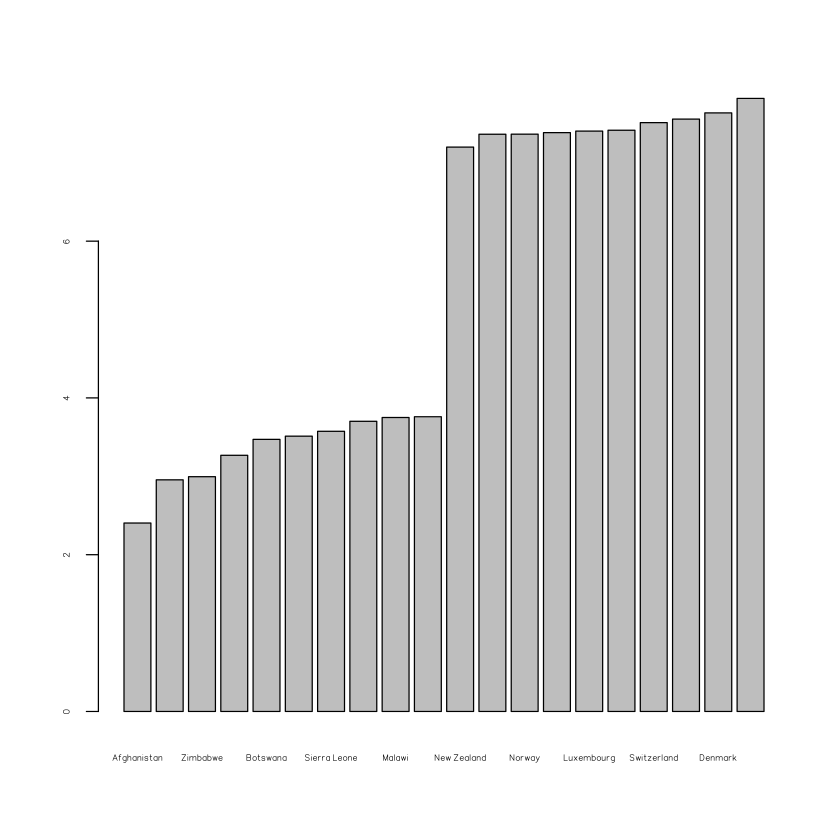

In [15]:
barplot(top_bottom_rows$Ladder.score, names.arg=top_bottom_rows$Country.name)

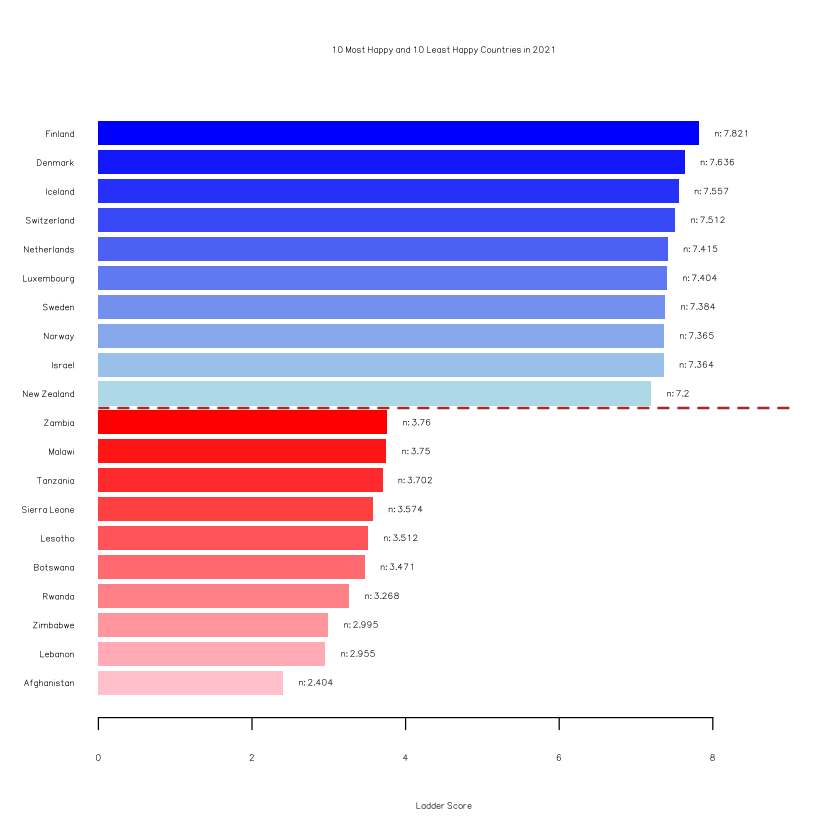

In [19]:
# Create horizontal barplot
comparison <- barplot(
  top_bottom_rows$Ladder.score,
  names.arg = top_bottom_rows$Country.name,
  col = bar_colors,
  horiz = TRUE,
  las = 1,
  border = FALSE,
  xlim = c(0,9),
  xlab = "Ladder Score",
  main = "10 Most Happy and 10 Least Happy Countries in 2021"
)


abline(h=12.1, col="brown", lwd = 2, lty = 2)

text(
  x = top_bottom_rows$Ladder.score + 0.2,
  y = comparison,
  labels = paste("n: ", top_bottom_rows$Ladder.score, sep = ""),
  adj = 0  # left align text at x position
)

In [20]:
# https://r-graph-gallery.com/37-barplot-with-number-of-observation.html

png("happy_countries_2021.png", width = 1800, height = 1600, res = 300)
# Create two gradients of colors
colors_10_blu <- colorRampPalette(c("lightblue", "blue"))(10)
colors_10_red <- colorRampPalette(c("pink", "red"))(10)

# Combine colors
bar_colors <- c(colors_10_red, colors_10_blu)

# Create horizontal barplot
comparison <- barplot(
  top_bottom_rows$Ladder.score,
  names.arg = top_bottom_rows$Country.name,
  col = bar_colors,
  horiz = TRUE,
  las = 1,
  border = FALSE,
  xlim = c(0,9),
  xlab = "Ladder Score",
  main = "10 Most Happy and 10 Least Happy Countries in 2021"
)


abline(h=12.1, col="brown", lwd = 2, lty = 2)

text(
  x = top_bottom_rows$Ladder.score + 0.2,
  y = comparison,
  labels = paste("n: ", top_bottom_rows$Ladder.score, sep = ""),
  adj = 0  # left align text at x position
)

dev.off()

pdf 
  2 

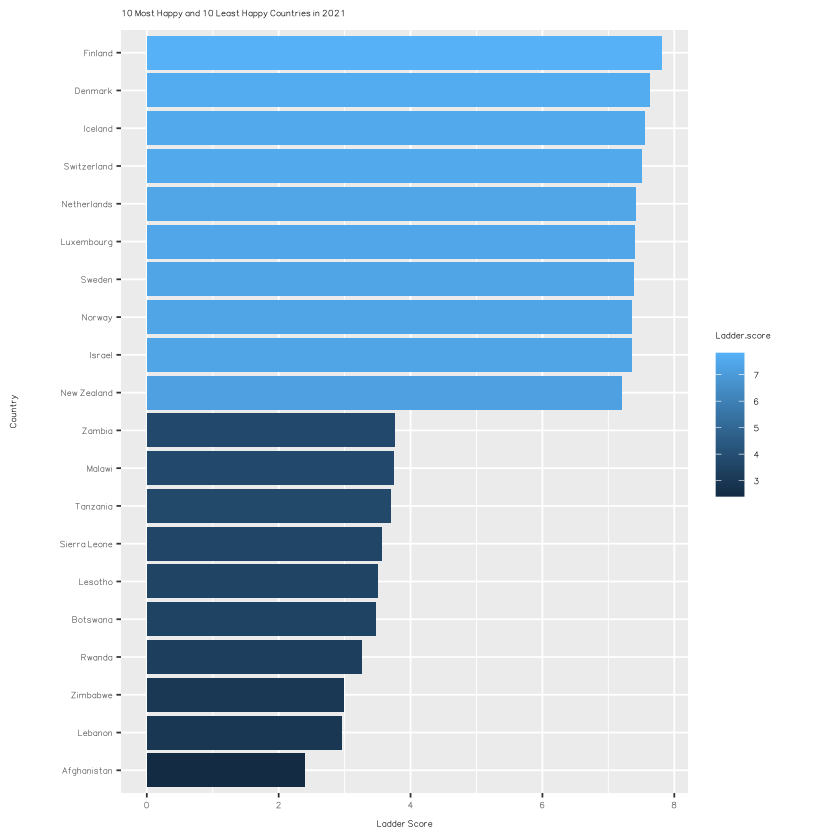

In [21]:
library(ggplot2)

# Assuming top_bottom_rows has Country.name and Ladder.score

ggplot(top_bottom_rows, aes(x = reorder(Country.name, Ladder.score), y = Ladder.score, fill = Ladder.score)) +
  geom_col() +
  coord_flip() +
  labs(title = "10 Most Happy and 10 Least Happy Countries in 2021",
       x = "Country",
       y = "Ladder Score")

ggsave("happy_plot.png", width = 10, height = 8, dpi = 300)


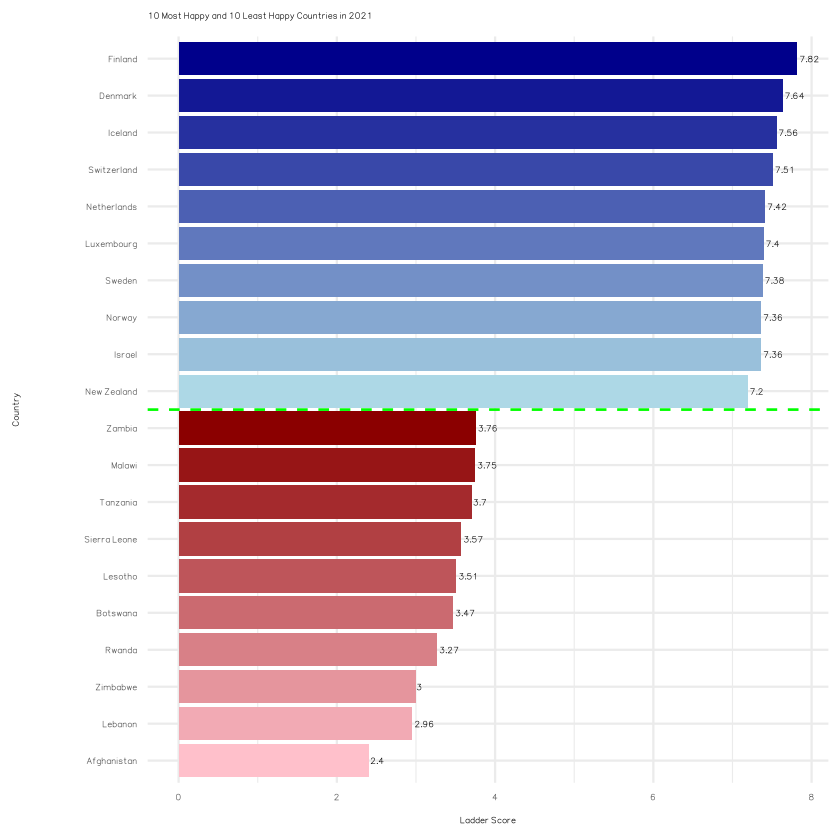

In [24]:
library(ggplot2)

# 1. Add group labels
top_bottom_rows$Group <- c(rep("Least Happy", 10), rep("Most Happy", 10))

# 2. Create color gradients for each group
# Define gradient functions
reds <- colorRampPalette(c("pink","darkred"))
blues <- colorRampPalette(c("lightblue", "darkblue"))

# 3. Split data
least_happy <- top_bottom_rows[top_bottom_rows$Group == "Least Happy", ]
most_happy <- top_bottom_rows[top_bottom_rows$Group == "Most Happy", ]

# 4. Create gradient colors based on scores
least_happy$FillColor <- reds(nrow(least_happy))[rank(least_happy$Ladder.score)]
most_happy$FillColor <- blues(nrow(most_happy))[rank(most_happy$Ladder.score)]

# 5. Combine again
top_bottom_rows_colored <- rbind(least_happy, most_happy)

# 6. Plot using pre-computed fill colors
ggplot(top_bottom_rows_colored, aes(x = reorder(Country.name, Ladder.score), y = Ladder.score, fill = FillColor)) +
  geom_col() +
  geom_text(aes(label = round(Ladder.score, 2)), 
            hjust = -0.1, 
            size = 4, 
            color = "black") +
  geom_vline(xintercept = 10.5, color = "green", linetype = "dashed", linewidth = .75) +
  coord_flip() +
  scale_fill_identity() +  # use exact fill colors from data
  labs(
    title = "10 Most Happy and 10 Least Happy Countries in 2021",
    x = "Country",
    y = "Ladder Score"
  ) +
  theme_minimal(base_size = 14)
